In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [3]:
primary_results = pd.read_csv('/users/veronicaventure/Documents/primary_results.csv')
primary_results.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [4]:
uscities=pd.read_excel('/users/veronicaventure/Documents/uscities.xlsx')
uscities.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840116412
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840097718
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840096300
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840097082
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840116371


In [5]:
county_info= uscities[['state_name','county_name','lat','lng']]
county_info.head()

,state_name,county_name,lat,lng
0,Washington,Pierce,46.9994,-122.3921
1,Washington,Kittitas,47.2507,-121.0989
2,Washington,Lincoln,47.3048,-117.9713
3,Washington,Pierce,47.3352,-122.5968
4,Washington,Snohomish,48.0639,-122.0920


In [6]:
new_county=county_info.rename(columns={'state_name':'state', 'county_name':'county'})
new_county.head(20)
new_county2=new_county.drop_duplicates(['state','county'],keep= 'last')

In [7]:
geo_data=pd.merge(new_county, primary_results, how='left', on=['state','county'])
geo_data.head()

,state,county,lat,lng,state_abbreviation,fips,party,candidate,votes,fraction_votes
0,Washington,Pierce,46.9994,-122.3921,WA,53053.0,Democrat,Bernie Sanders,1968.0,0.733
1,Washington,Pierce,46.9994,-122.3921,WA,53053.0,Democrat,Hillary Clinton,712.0,0.265
2,Washington,Pierce,46.9994,-122.3921,WA,53053.0,Republican,Donald Trump,48071.0,0.760
3,Washington,Pierce,46.9994,-122.3921,WA,53053.0,Republican,John Kasich,5893.0,0.093
4,Washington,Pierce,46.9994,-122.3921,WA,53053.0,Republican,Ted Cruz,6848.0,0.108


In [8]:
geo_data=pd.merge(new_county2, primary_results, how='left', on=['state','county'])
geo_data.head()

,state,county,lat,lng,state_abbreviation,fips,party,candidate,votes,fraction_votes
0,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Democrat,Bernie Sanders,255.0,0.770
1,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Democrat,Hillary Clinton,76.0,0.230
2,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Republican,Donald Trump,8727.0,0.800
3,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Republican,John Kasich,777.0,0.071
4,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Republican,Ted Cruz,991.0,0.091


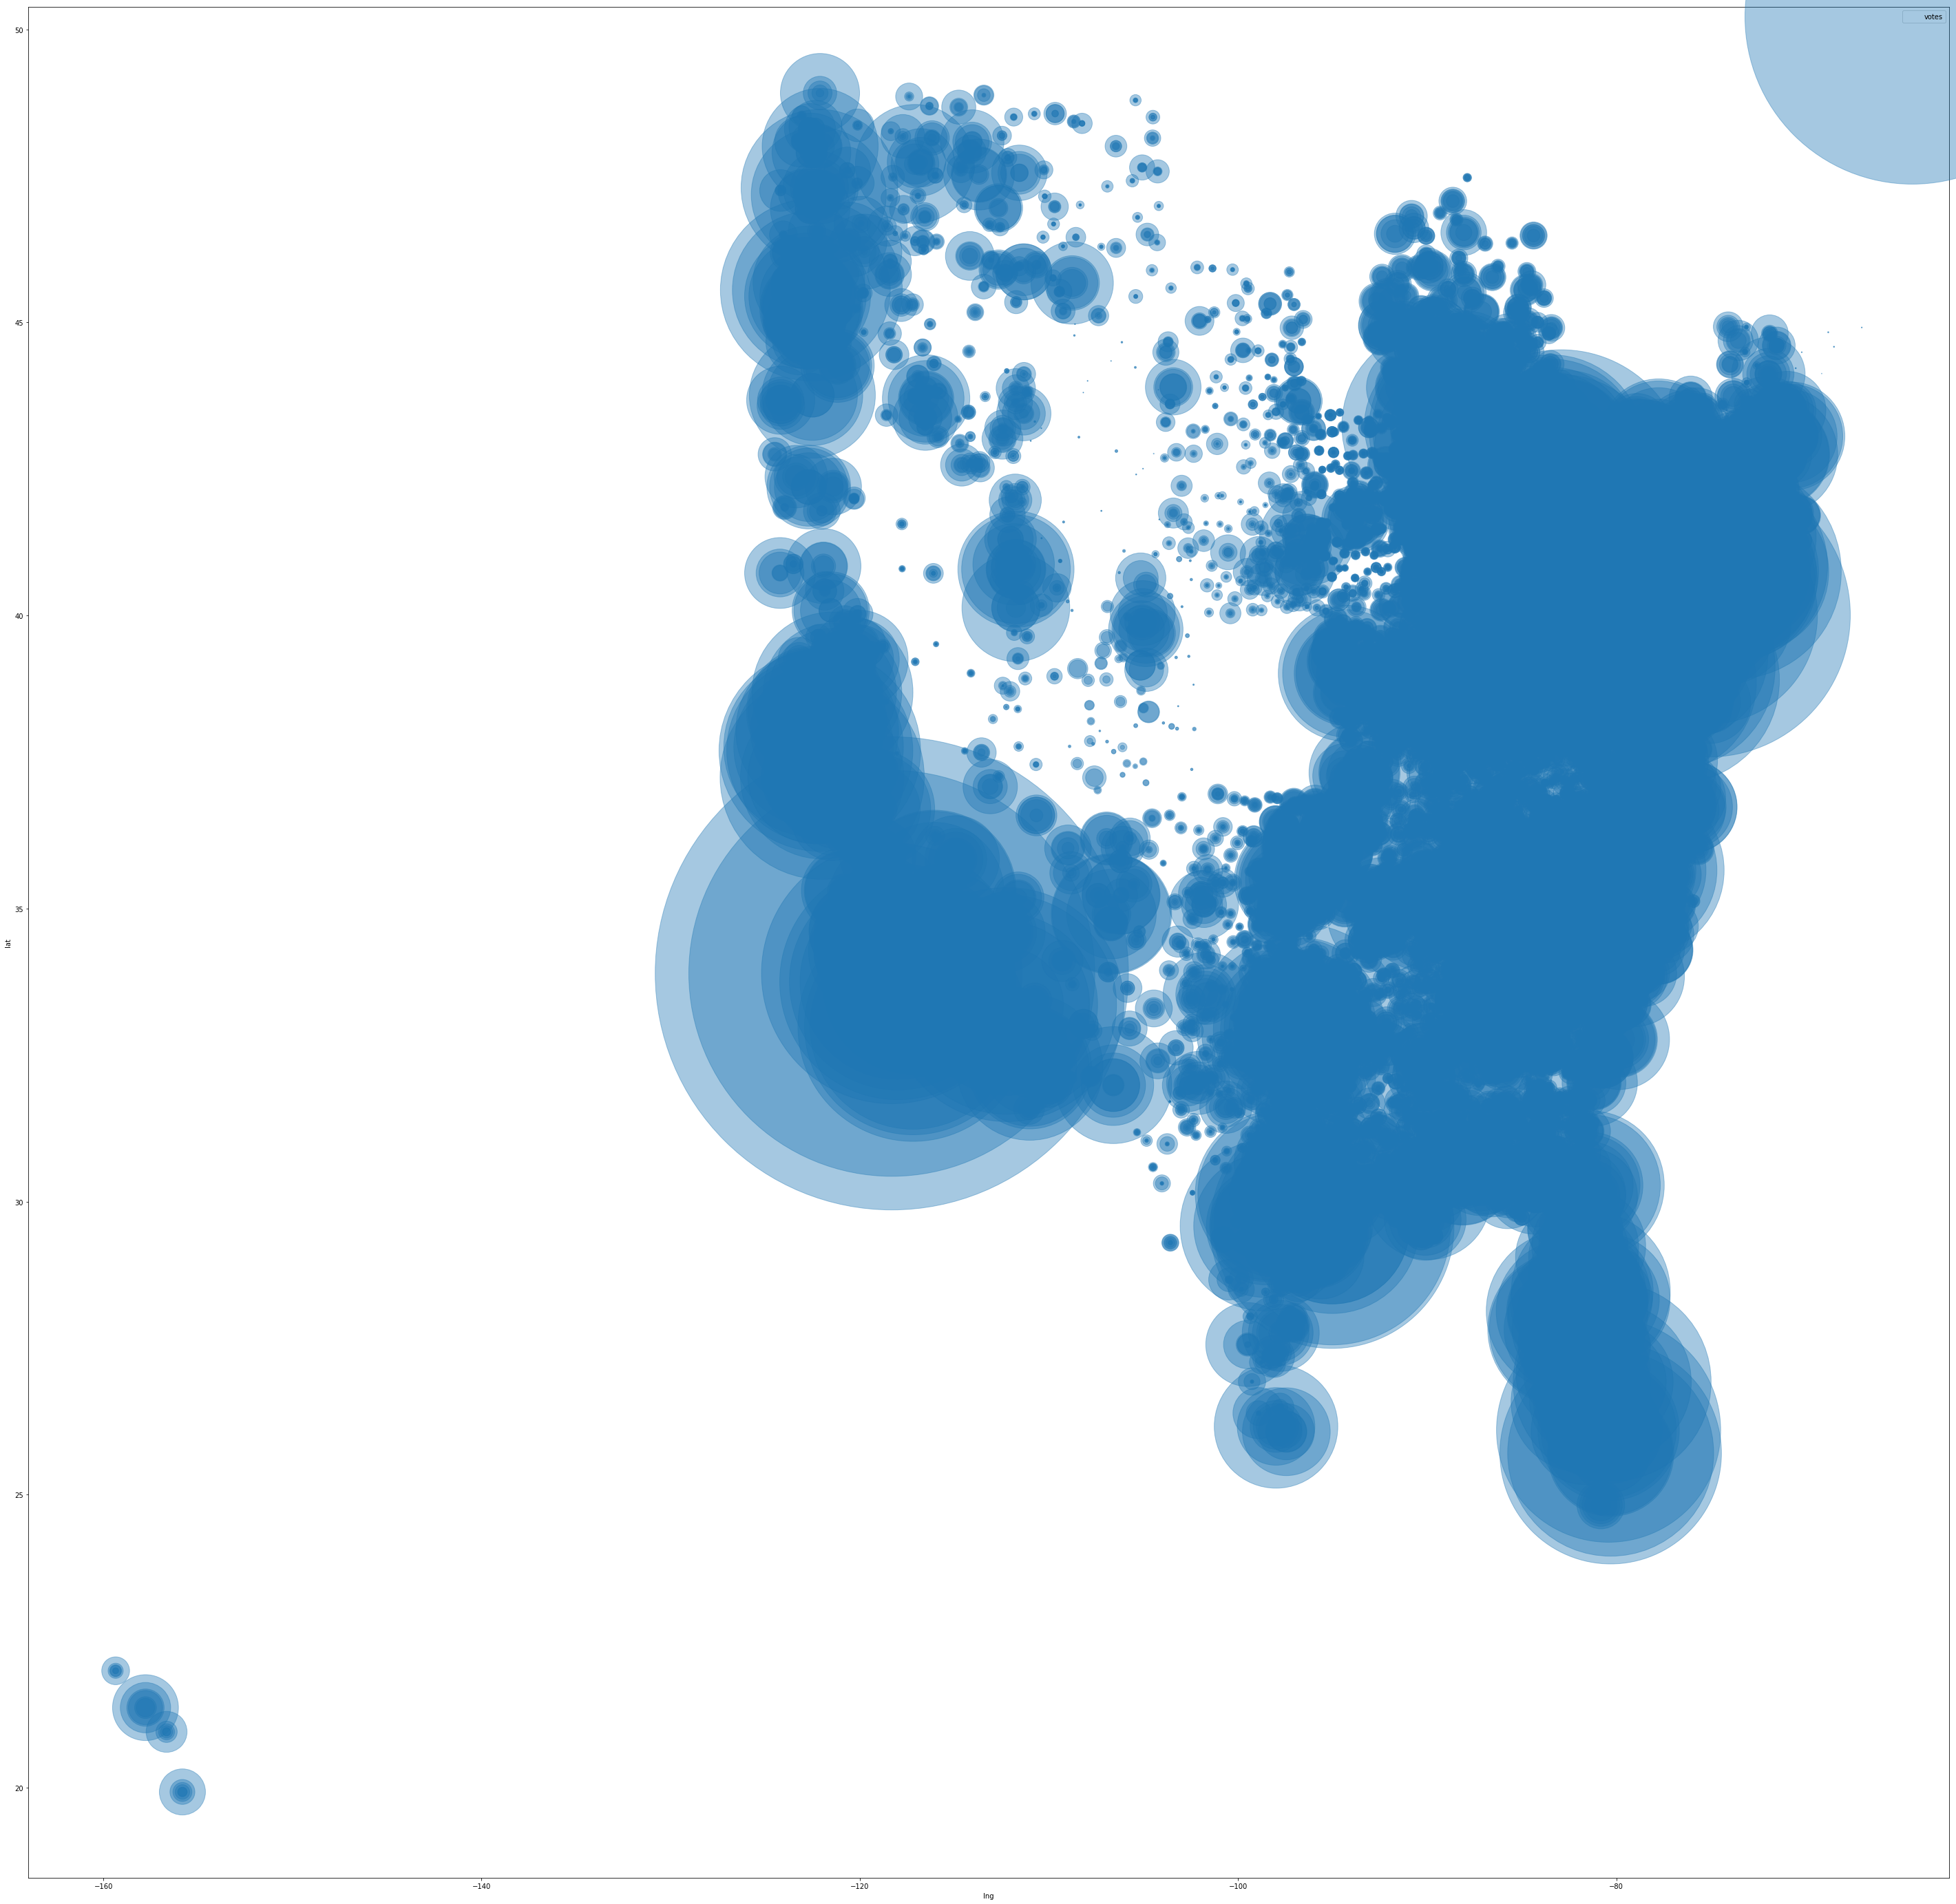

In [11]:
geo_data.plot(kind = "scatter",
             x = 'lng',
             y = 'lat',
             figsize = (50,50),
             alpha = 0.4,
             s = geo_data['votes']*.8,
             label = 'votes',
           );

Text(0,0.5,'Latitude')

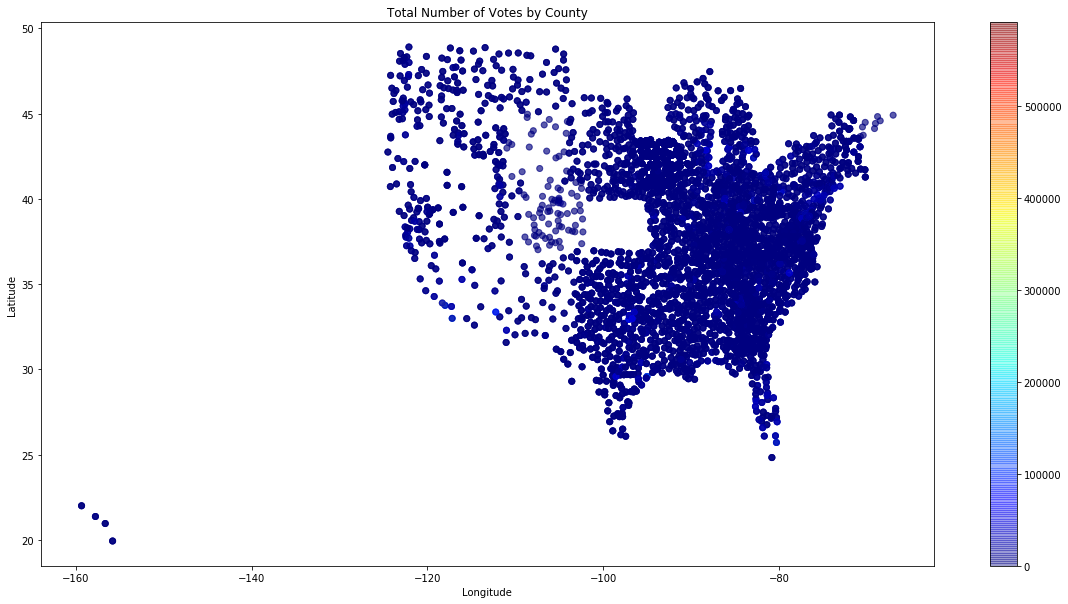

In [42]:
fig = plt.figure(figsize=(20,10))
plt.scatter(geo_data.lng, geo_data.lat, c= geo_data.votes, cmap='jet', alpha=.4)
plt.colorbar()
plt.title("Total Number of Votes by County")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [28]:
hillary=primary_results.loc[primary_results['candidate']=='Hillary Clinton']
hillary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
5,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906
7,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755
9,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551


In [29]:
hillary_geo=pd.merge(new_county2, hillary, how='left', on=['state','county'])
hillary_geo.head()




,state,county,lat,lng,state_abbreviation,fips,party,candidate,votes,fraction_votes
0,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Democrat,Hillary Clinton,76.0,0.230
1,Washington,San Juan,48.5324,-123.0655,WA,53055.0,Democrat,Hillary Clinton,25.0,0.240
2,Washington,Pend Oreille,48.8540,-117.3899,WA,53051.0,Democrat,Hillary Clinton,10.0,0.222
3,Washington,Garfield,46.4737,-117.5967,WA,53023.0,Democrat,Hillary Clinton,2.0,0.400
4,Washington,Chelan,47.5948,-120.6633,WA,53007.0,Democrat,Hillary Clinton,63.0,0.283


Text(0,0.5,'latitude')

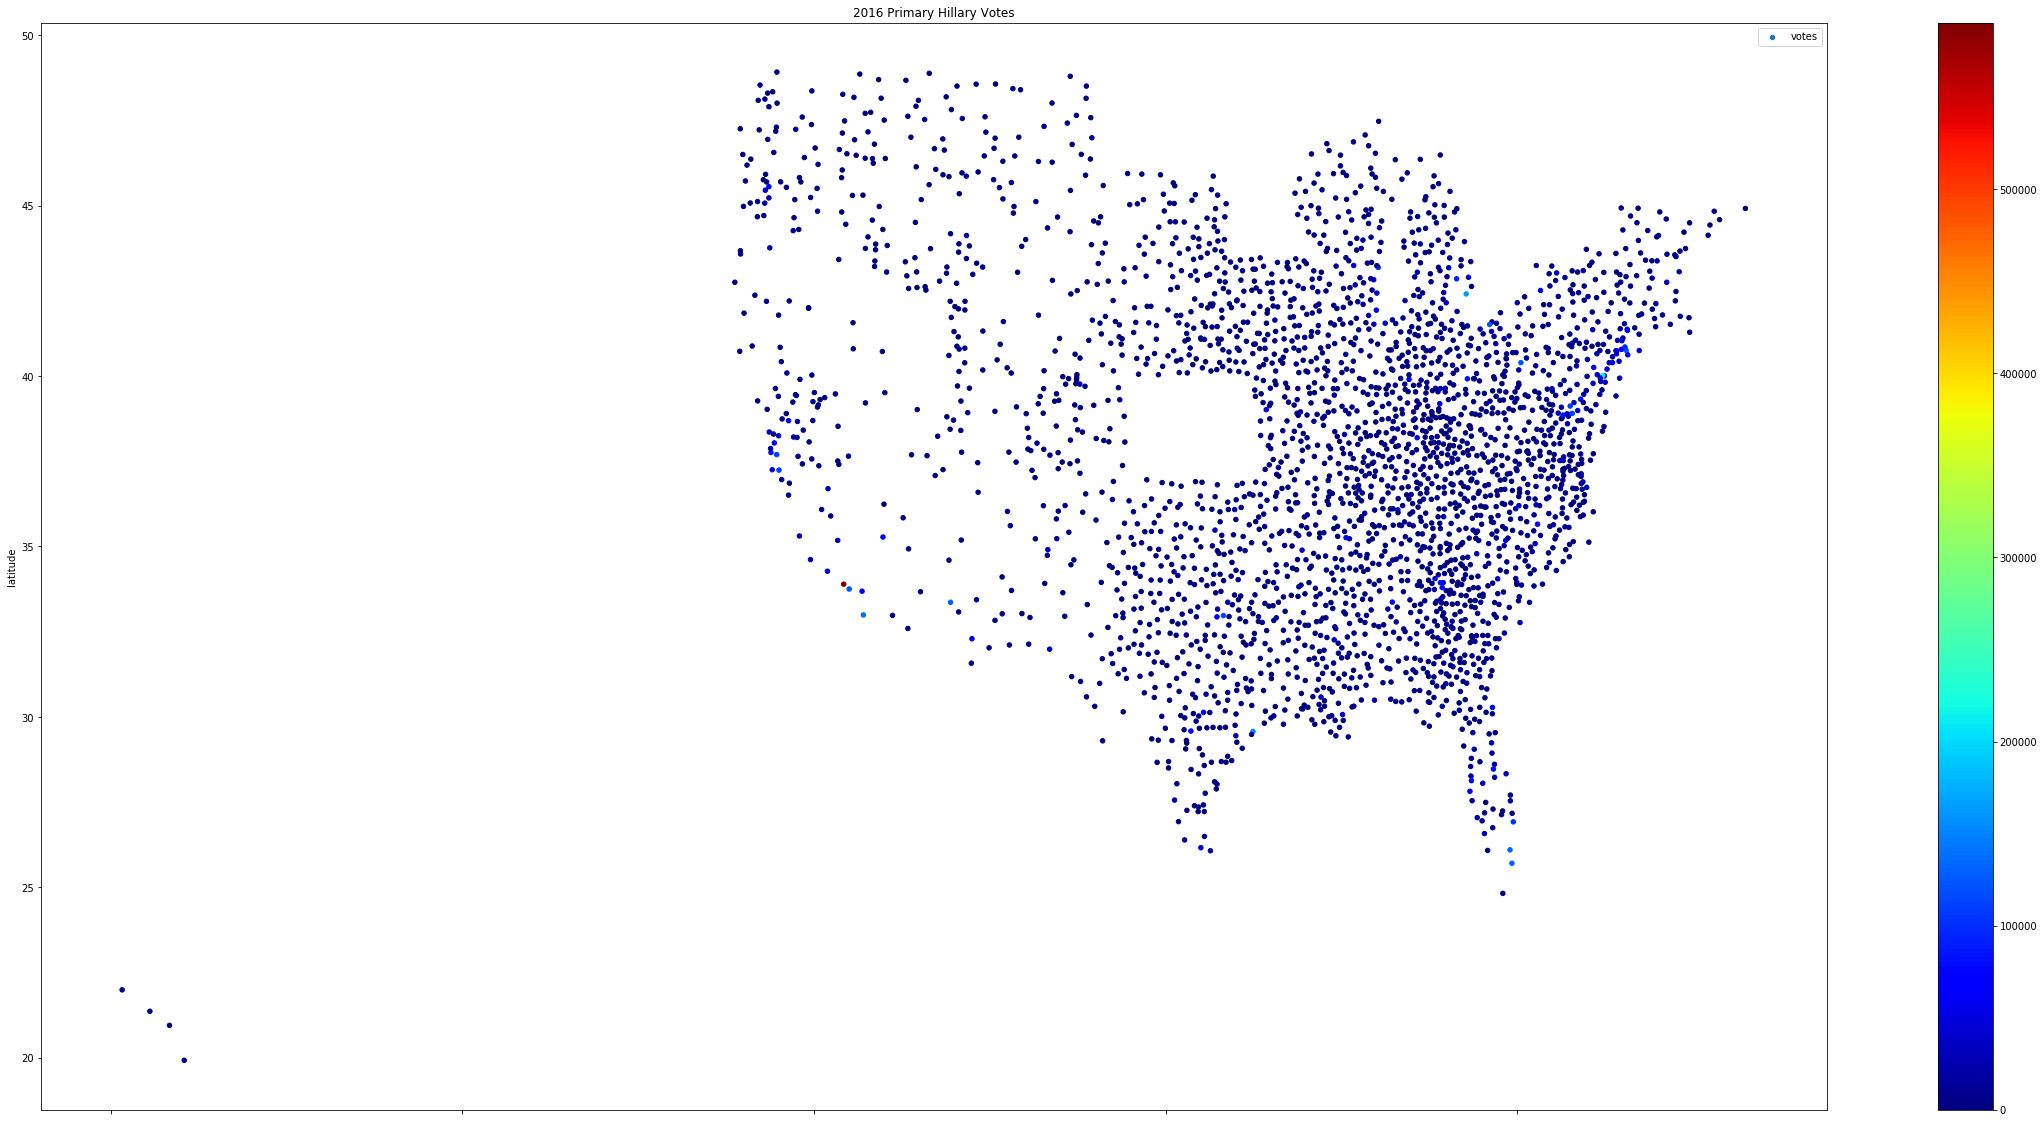

In [37]:
ax= hillary_geo.plot(kind = "scatter",
             x = 'lng',
             y = 'lat',
             figsize = (40,20),
             alpha = 1,
             #s = hillary_geo['votes'],
             label = 'votes',
             c= hillary_geo['votes'],
             cmap='jet',
             colorbar= True,
             title='2016 Primary Hillary Votes', 
            
           );
ax.set_xlabel("longitude")
ax.set_ylabel('latitude')
#s = hillary_geo['votes'] changes the size of each dot based on number of votes

Text(0,0.5,'Latitude')

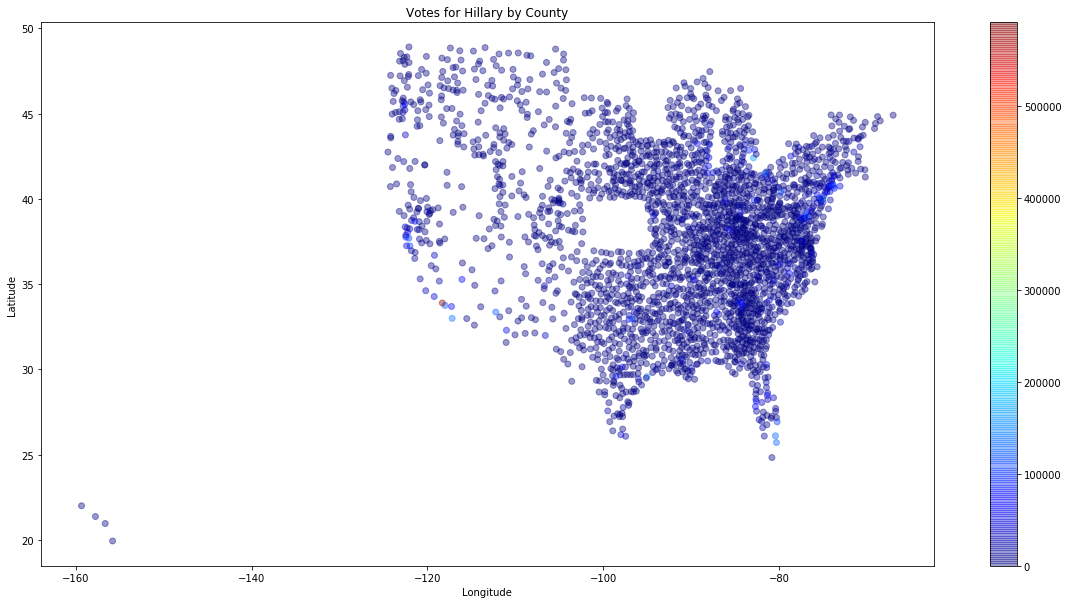

In [43]:
fig = plt.figure(figsize=(20,10))
plt.scatter(hillary_geo.lng, hillary_geo.lat, c= hillary_geo.votes, cmap='jet', alpha=.4)
plt.colorbar()
plt.title("Votes for Hillary by County")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [44]:
sorted_geo=geo_data.sort_values(by=['state','county','votes'])

In [40]:
top_votes=sorted_geo.drop_duplicates(['state','county'],keep= 'last')
top_votes.head()

,state,county,lat,lng,state_abbreviation,fips,party,candidate,votes,fraction_votes
7946,Alabama,Autauga,32.5797,-86.4529,AL,1001.0,Republican,Donald Trump,5387.0,0.445
7932,Alabama,Baldwin,31.0034,-87.6323,AL,1003.0,Republican,Donald Trump,23618.0,0.469
8091,Alabama,Barbour,31.6635,-85.5035,AL,1005.0,Democrat,Hillary Clinton,2567.0,0.906
7799,Alabama,Bibb,32.9421,-87.1753,AL,1007.0,Republican,Donald Trump,1959.0,0.494
8030,Alabama,Blount,33.9965,-86.5671,AL,1009.0,Republican,Donald Trump,7390.0,0.487


Text(0.5,0.98,'Distribution of Votes by Candidate')

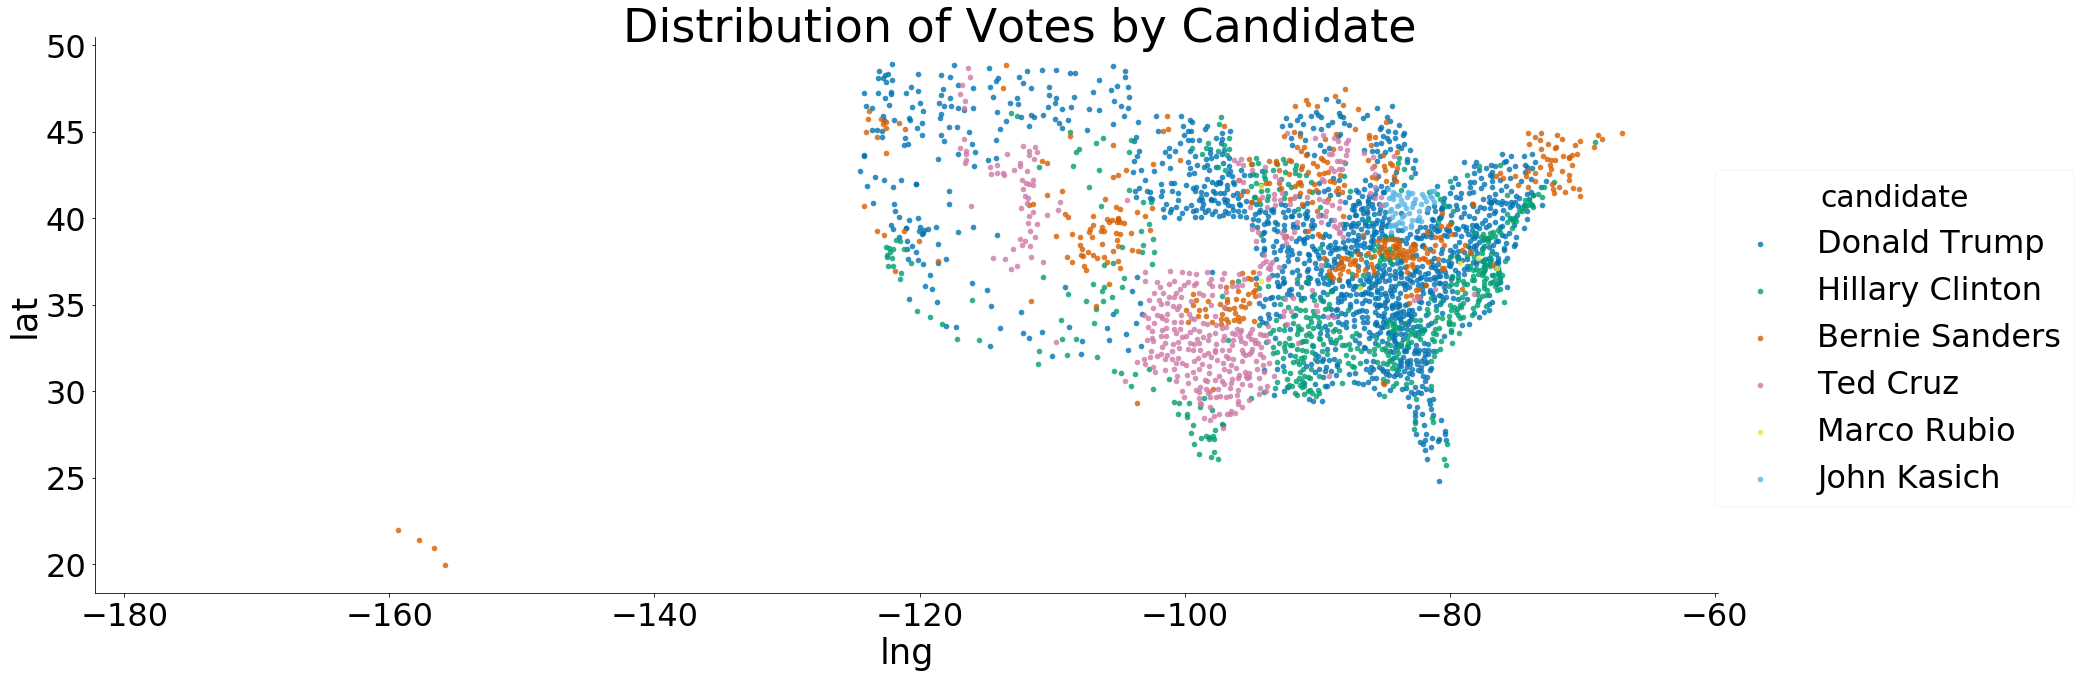

In [48]:
sns.set_context('paper', font_scale=4)
sns.lmplot('lng', 'lat', data=top_votes, 
           hue='candidate', 
           palette='colorblind', 
           fit_reg=False, size=10, aspect=2.5).fig.suptitle("Distribution of Votes by Candidate")